# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [201]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [202]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Statements

In [203]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [204]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [205]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [206]:
print(f"The Data Frame has {df_data.shape[0]} rows and {df_data.shape[1]} columns")
df_data.columns

The Data Frame has 4324 rows and 9 columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [207]:
print(f"Any Duplicates in the data set?: {df_data.duplicated().values.any()}")
print(f"Any NaN in the data set?: {df_data.isna().values.any()}")

Any Duplicates in the data set?: False
Any NaN in the data set?: True


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 


In [208]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [209]:
df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df_data_prices = df_data.dropna()

In [210]:
print(f"The Data Frame has {df_data_prices.shape[0]} rows and {df_data_prices.shape[1]} columns")
df_data_prices.columns

The Data Frame has 964 rows and 7 columns


Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

## Descriptive Statistics

In [211]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [212]:
status_counts = df_data['Mission_Status'].value_counts()
print(status_counts)

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64


In [213]:
success_pct = status_counts.get('Success') / df_data['Mission_Status'].count() * 100
print(f"Mission success rate is {success_pct:.3} %")
failure_pct = status_counts.get('Failure') / df_data['Mission_Status'].count() * 100
print(f"Mission success rate is {failure_pct:.3} %")

Mission success rate is 89.7 %
Mission success rate is 7.84 %


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [214]:
organization_counts = df_data['Organisation'].value_counts()[:20]

In [215]:
org_bar = px.bar(x=organization_counts.index,
             y=organization_counts.values,
             title="Number of Missions per Organization",
             color=organization_counts.values)
org_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [216]:
rocket_counts = df_data['Rocket_Status'].value_counts()
rocket_counts = rocket_counts.rename(index={
    'StatusActive': 'Active',
    'StatusRetired': 'Retired'
})
rocket_counts

Rocket_Status
Retired    3534
Active      790
Name: count, dtype: int64

In [217]:
rocket_bar = px.bar(
    x=rocket_counts.index,
    y=rocket_counts.values,
    title="Number of Retired vs. Active Rockets",
    labels={'x': 'Rocket Status', 'y': 'Number of Rockets'}
)
rocket_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [218]:
status_counts = df_data['Mission_Status'].value_counts()
print(status_counts)

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64


In [219]:
status_bar = px.bar(
    x=status_counts.index,
    y=status_counts.values,
    title="Successes vs. Failures"
)
status_bar.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [220]:
df_clean_prices = df_data_prices.copy()
df_clean_prices['Price'] = df_data_prices['Price'].str.replace(',', '', regex=False).astype(float)
df_sorted_prices = df_clean_prices.sort_values(by='Price', ascending=False)
df_sorted_prices

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.00",Success
3603,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Dec 21, 1968 12:51 UTC",Saturn V | Apollo 8,StatusRetired,"1,160.00",Success
3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.00",Success
...,...,...,...,...,...,...,...
399,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Wed Nov 09, 2016 23:42 UTC","Long March 11 | XPNAV 1, Xiaoxiang 1 & Others",StatusActive,5.30,Success
166,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Mon Jan 21, 2019 05:42 UTC",Long March 11 | Jilin-1 Hyperspectral & Others,StatusActive,5.30,Success
133,CASC,"Tai Rui Barge, Yellow Sea","Wed Jun 05, 2019 04:06 UTC",Long March 11H | Jilin-1 & Others,StatusActive,5.30,Success
249,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Apr 26, 2018 04:42 UTC",Long March 11 | Zhuhai-1 2A to 2D,StatusActive,5.30,Success


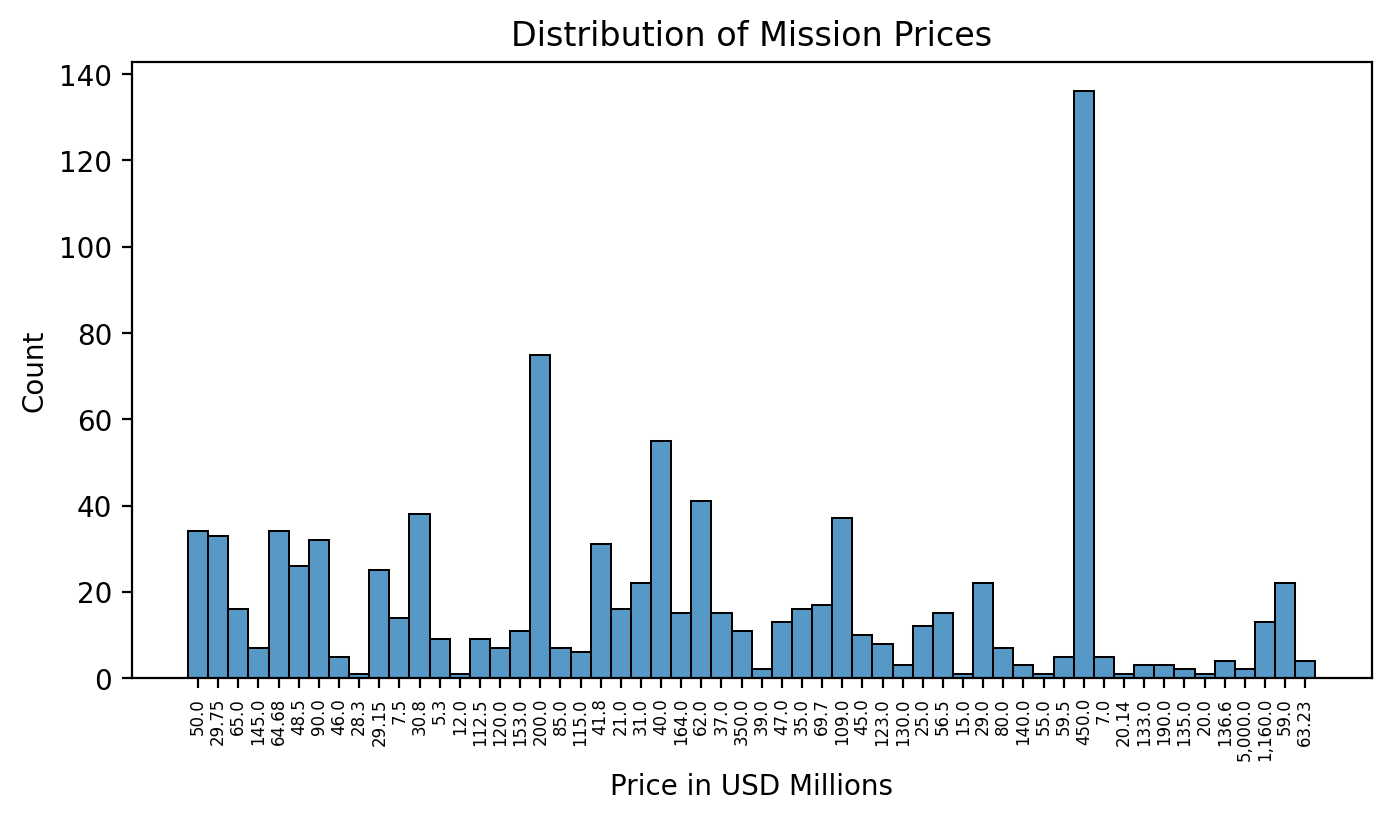

In [221]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data_prices,
             x=df_data_prices.Price,
             bins=30
             )
plt.xlabel("Price in USD Millions")
plt.title("Distribution of Mission Prices")
plt.xticks(rotation=90, fontsize=6)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA
* Kiritimati Launch Area should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [222]:
df_data['Location'] = df_data['Location'].str.replace("Russia", "Russian Federation", regex=False)
df_data.loc[df_data['Location'].str.contains('New Mexico', na=False), 'Location'] += ", USA"
df_data.loc[df_data['Location'].str.contains('Yellow Sea', na=False), 'Location'] += ", China"
df_data.loc[df_data['Location'].str.contains('Shahrud Missile Test Site', na=False), 'Location'] += ", Iran"
df_data.loc[df_data['Location'].str.contains('Pacific Missile Range Facility', na=False), 'Location'] += ", USA"
df_data.loc[df_data['Location'].str.contains('Barents Sea', na=False), 'Location'] += ", Russian Federation"
df_data.loc[df_data['Location'].str.contains('Gran Canaria', na=False), 'Location'] += ", USA"
df_data.loc[df_data['Location'].str.contains('Kiritimati Launch Area', na=False), 'Location'] += ", USA"
df_data['Location'].unique()

array(['LC-39A, Kennedy Space Center, Florida, USA',
       'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China',
       'Pad A, Boca Chica, Texas, USA',
       'Site 200/39, Baikonur Cosmodrome, Kazakhstan',
       'SLC-41, Cape Canaveral AFS, Florida, USA',
       'LC-9, Taiyuan Satellite Launch Center, China',
       'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'LC-101, Wenchang Satellite Launch Center, China',
       'SLC-40, Cape Canaveral AFS, Florida, USA',
       'LA-Y1, Tanegashima Space Center, Japan',
       'LP-0B, Wallops Flight Facility, Virginia, USA',
       'Site 95, Jiuquan Satellite Launch Center, China',
       'LC-3, Xichang Satellite Launch Center, China',
       'Pad 1, Palmachim Airbase, Israel',
       'Rocket Lab LC-1A, M?\x81hia Peninsula, New Zealand',
       'LC-2, Xichang Satellite Launch Center, China',
       'Xichang Satellite Launch Center, China',
       'Cosmic Girl, Mojave Air and Space Port, California, USA',
       'Site 43/4, Plese

In [223]:
def extract_country_name(location):
    try:
        return location.split(',')[-1].strip()
    except:
        return None

df_data['Country'] = df_data['Location'].apply(extract_country_name)


In [224]:
df_data['Country'] = df_data['Country'].str.replace("Iran", "Iran, Islamic Republic of", regex=False)
df_data['Country'] = df_data['Country'].str.replace("North Korea", "Korea, Democratic People's Republic of", regex=False)
df_data['Country'] = df_data['Country'].str.replace("South Korea", "Korea, Republic of", regex=False)
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran, Islamic Republic of', 'France',
       'India', "Korea, Democratic People's Republic of",
       'Korea, Republic of', 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [225]:
def get_country_code(country):
    try:
        return countries.get(country).alpha3
    except:
        print(f"{country} is wrong or has no code")

df_data['ISO'] = df_data['Country'].apply(get_country_code)

In [226]:
df_countries = df_data.groupby(['Country', 'ISO'], as_index=False).agg({'Location': pd.Series.count})
df_countries.rename(columns={'Location': 'Missions'}, inplace=True)
df_countries.sort_values('Missions', ascending=False)

,Country,ISO,Missions
13,Russian Federation,RUS,1398
14,USA,USA,1387
8,Kazakhstan,KAZ,701
3,France,FRA,303
2,China,CHN,269
7,Japan,JPN,126
4,India,IND,76
5,"Iran, Islamic Republic of",IRN,14
12,New Zealand,NZL,13
6,Israel,ISR,11


In [227]:
world_map = px.choropleth(df_countries,
                         locations='ISO',
                         color='Missions',
                         hover_name='Country',
                         hover_data='Missions',
                         color_continuous_scale=px.colors.sequential.matter,
                         )

world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [228]:
df_failures = df_data[df_data['Mission_Status'] != 'Success']
df_countries_failures = df_failures.groupby(['Country', 'ISO'], as_index=False).agg({'Location': pd.Series.count})
df_countries_failures.rename(columns={'Location': 'Failed_Missions'}, inplace=True)
df_countries_failures.sort_values('Failed_Missions', ascending=False)

,Country,ISO,Failed_Missions
13,USA,USA,166
8,Kazakhstan,KAZ,93
12,Russian Federation,RUS,93
2,China,CHN,25
3,France,FRA,18
4,India,IND,13
7,Japan,JPN,13
5,"Iran, Islamic Republic of",IRN,9
0,Australia,AUS,3
1,Brazil,BRA,3


In [229]:
world_map = px.choropleth(df_countries_failures,
                         locations='ISO',
                         color='Failed_Missions',
                         hover_name='Country',
                         hover_data='Failed_Missions',
                         color_continuous_scale=px.colors.sequential.matter,
                         )

world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [230]:
country_organization_missions = df_data.groupby(['Country', 'Organisation'], as_index=False).agg({'Location': pd.Series.count})
country_organization_missions.rename(columns={'Location': 'Missions'}, inplace=True)

In [231]:
burst = px.sunburst(country_organization_missions,
                    path=["Country",
                          "Organisation"],
                          values="Missions",
                          title="Country and Organization Counts")

burst.update_layout(xaxis_title='Number Of Missions',
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [232]:
df_clean_prices['Location'] = df_data['Location'].str.replace("Russia", "Russian Federation", regex=False)
df_clean_prices.loc[df_data['Location'].str.contains('New Mexico', na=False), 'Location'] += ", USA"
df_clean_prices.loc[df_data['Location'].str.contains('Yellow Sea', na=False), 'Location'] += ", China"
df_clean_prices.loc[df_data['Location'].str.contains('Shahrud Missile Test Site', na=False), 'Location'] += ", Iran"
df_clean_prices.loc[df_data['Location'].str.contains('Pacific Missile Range Facility', na=False), 'Location'] += ", USA"
df_clean_prices.loc[df_data['Location'].str.contains('Barents Sea', na=False), 'Location'] += ", Russian Federation"
df_clean_prices.loc[df_data['Location'].str.contains('Gran Canaria', na=False), 'Location'] += ", USA"
df_clean_prices.loc[df_data['Location'].str.contains('Kiritimati Launch Area', na=False), 'Location'] += ", USA"

In [233]:
df_clean_prices['Country'] = df_clean_prices['Location'].apply(extract_country_name)
df_clean_prices

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China
...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA


In [234]:
organization_spending = df_clean_prices.groupby('Organisation', as_index=False)['Price'].sum()
organization_spending.rename(columns={"Price": "Total_Spent_in_USD_Millions"}, inplace=True)
organization_spending_sorted = organization_spending.sort_values("Total_Spent_in_USD_Millions", ascending=False)
organization_spending_sorted

,Organisation,Total_Spent_in_USD_Millions
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
22,US Air Force,"1,550.92"


In [235]:
spending = px.bar(
    x=organization_spending_sorted.Organisation,
    y=organization_spending_sorted.Total_Spent_in_USD_Millions,
    color=organization_spending_sorted.Total_Spent_in_USD_Millions,
    title="Organisational Spending Total",
    color_continuous_scale='Aggrnyl'
)

spending.update_layout(
    xaxis_title='Organisation',
    coloraxis_showscale=False,
    yaxis_title='Total Spent in USD Millions'
)

spending.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [236]:
df_clean_prices.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [237]:
average_prices = df_clean_prices.groupby('Organisation', as_index=False)['Price'].mean()
average_prices_sorted = average_prices.sort_values('Price', ascending=False)
average_prices_sorted

,Organisation,Price
16,RVSN USSR,"5,000.00"
14,NASA,511.95
1,Boeing,177.29
0,Arianespace,170.26
21,ULA,151.00
7,ILS,101.54
12,MHI,95.47
13,Martin Marietta,80.16
22,US Air Force,59.65
9,JAXA,56.00


In [238]:
spending = px.bar(
    x=average_prices_sorted.Organisation,
    y=average_prices_sorted.Price,
    color=average_prices_sorted.Price,
    title="Organisational Spending Average",
    color_continuous_scale='Aggrnyl'
)

spending.update_layout(
    xaxis_title='Organisation',
    coloraxis_showscale=False,
    yaxis_title='Average Spent in USD Millions'
)

spending.show()

# Chart the Number of Launches per Year

In [239]:
df_data.Date = pd.to_datetime(df_data.Date, format='mixed', utc=True)

In [240]:
df_data['Year'] = df_data['Date'].dt.year
launches_per_year = df_data['Year'].value_counts().sort_index()

In [241]:
fig = px.bar(
    x=launches_per_year.index,
    y=launches_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Launches'},
    title='Number of Launches per Year'
)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [242]:
df_data['YearMonth'] = df_data['Date'].dt.to_period('M')
df_monthly_data = df_data['YearMonth'].value_counts().sort_index()
df_monthly_data = df_monthly_data.reset_index()
df_monthly_data.columns = ['Date', 'Missions']
df_monthly_data['Date'] = df_monthly_data['Date'].dt.to_timestamp()

C:\Users\amart\AppData\Local\Temp\ipykernel_2952\2994466512.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [243]:
top_month = df_monthly_data.sort_values(by='Missions', ascending=False).head(1)
print(f"The month with the most missions was: {top_month['Date'].dt.strftime('%B %Y').iloc[0]} with {top_month['Missions'].iloc[0]} missions.")

The month with the most missions was: December 1971 with 18 missions.


In [244]:
df_monthly_data['Month'] = df_monthly_data['Date'].dt.strftime('%m')
monthly_average = df_monthly_data.groupby('Month')['Missions'].mean().sort_index()
monthly_average = monthly_average.reset_index()
monthly_average.columns = ['Month', 'Missions']
monthly_average['Month'] = pd.to_datetime(monthly_average['Month'], format='%m')
monthly_average['Month'].describe

<bound method NDFrame.describe of 0    1900-01-01
1    1900-02-01
2    1900-03-01
3    1900-04-01
4    1900-05-01
5    1900-06-01
6    1900-07-01
7    1900-08-01
8    1900-09-01
9    1900-10-01
10   1900-11-01
11   1900-12-01
Name: Month, dtype: datetime64[ns]>

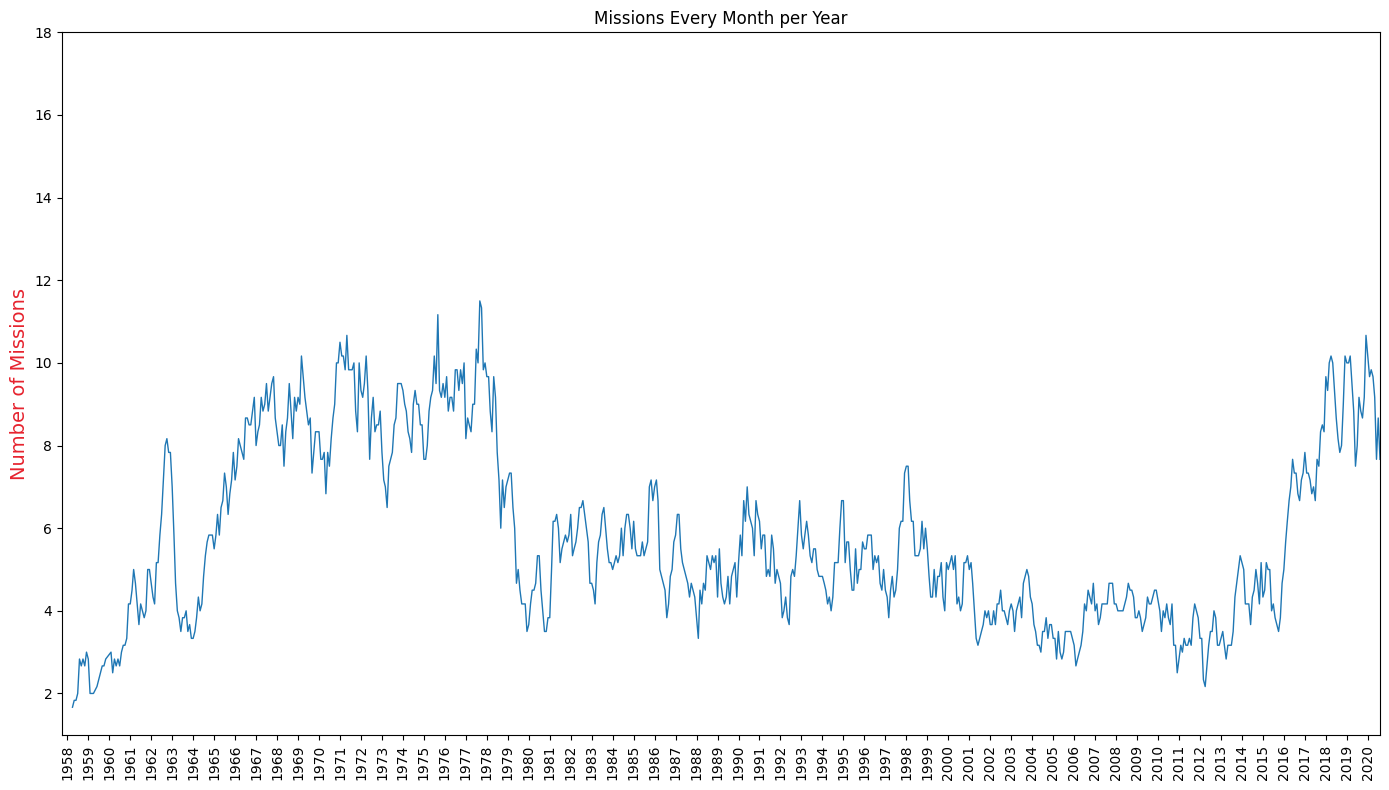

In [245]:
plt.figure(figsize=(14,8), dpi=100)
plt.title('Missions Every Month per Year')

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1 = plt.gca()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_ylabel('Number of Missions', color='#E6232E', fontsize=14)
roll_df = df_monthly_data[['Missions']].rolling(window=6).mean()

ax1.set_ylim([df_monthly_data.Missions.min(), df_monthly_data.Missions.max()])
ax1.set_xlim([df_monthly_data.Date.min(), df_monthly_data.Date.max()])

ax1.plot(df_monthly_data.Date, roll_df.Missions, linewidth=1)

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()




# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [246]:
df_monthly_data['Month'] = df_monthly_data['Date'].dt.strftime('%m')
monthly_average = df_monthly_data.groupby('Month')['Missions'].mean().sort_index()
monthly_average = monthly_average.reset_index()
monthly_average.columns = ['Month', 'Missions']
monthly_average['Month'] = pd.to_datetime(monthly_average['Month'], format='%m')


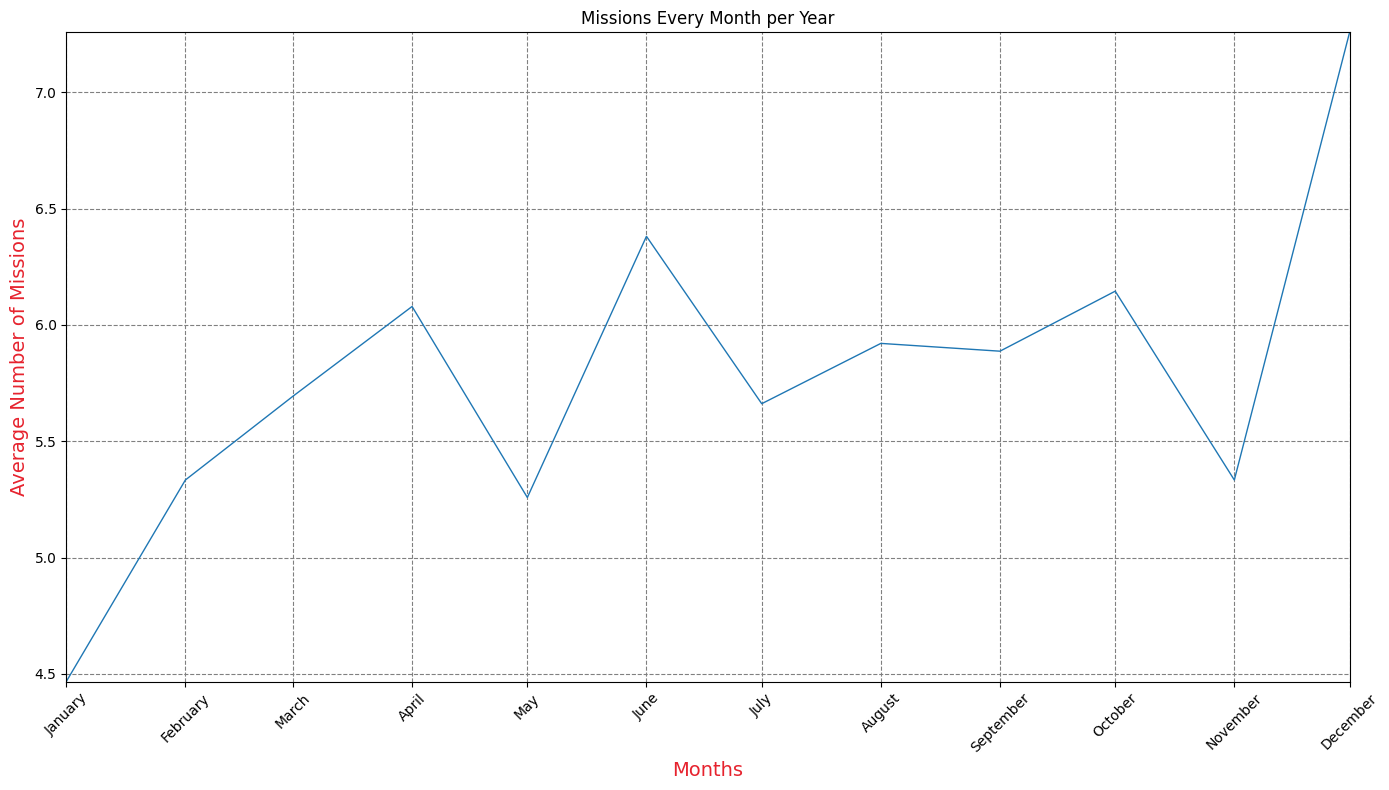

In [247]:
plt.figure(figsize=(14,8), dpi=100)
plt.title('Missions Every Month per Year')

months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%B')

ax1 = plt.gca()
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(months_fmt)


ax1.set_ylabel('Average Number of Missions', color='#E6232E', fontsize=14)
ax1.set_xlabel('Months', color='#E6232E', fontsize=14)

ax1.set_ylim([monthly_average.Missions.min(), monthly_average.Missions.max()])
ax1.set_xlim([monthly_average.Month.min(), monthly_average.Month.max()])
ax1.grid(color='grey', linestyle='--')

ax1.plot(monthly_average.Month, monthly_average.Missions, linewidth=1)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [248]:
df_clean_prices.Date = pd.to_datetime(df_clean_prices.Date, format='mixed', utc=True)
df_clean_prices['Year'] = df_clean_prices['Date'].dt.year
average_per_year = df_clean_prices.groupby('Year')['Price'].mean()
average_per_year = average_per_year.reset_index()


In [249]:
expense_line = px.line(average_per_year,
                       x='Year',
                       y='Price',
                       labels={'Year': 'Year', 'Price': 'Average Price Per Launch (USD Millions)'},
                       title='Average Cost Per Launch between 1964 - 2020',
                       )


expense_line.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [250]:
org_year_counts = df_data.groupby(['Organisation', 'Year']).size().reset_index(name='Missions')
org_year_counts

,Organisation,Year,Missions
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


In [251]:
top_10_orgs = df_data['Organisation'].value_counts()[:10].index
top_10_orgs

Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object', name='Organisation')

In [252]:
org_year_counts_top10 = org_year_counts[org_year_counts['Organisation'].isin(top_10_orgs)]
org_year_counts_top10

,Organisation,Year,Missions
12,Arianespace,1984,3
13,Arianespace,1985,4
14,Arianespace,1986,3
15,Arianespace,1987,2
16,Arianespace,1988,6
...,...,...,...
654,VKS RF,2016,4
655,VKS RF,2017,6
656,VKS RF,2018,5
657,VKS RF,2019,8


In [253]:
org_launch_yearly = px.line(
    org_year_counts_top10,
    x='Year',
    y='Missions',
    color='Organisation',
    labels={'Year': 'Year', 'Missions': 'Launches Per Year Per Organization'},
    title='Top 10 Organization Launches Per Year',                   
    )

org_launch_yearly.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [254]:
df_coldwar = df_data[df_data['Year'] <= 1991]
df_coldwar

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,YearMonth
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28 12:00:00+00:00,Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,China,CHN,1991,1991-12
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Kazakhstan,KAZ,1991,1991-12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russian Federa...",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russian Federation,RUS,1991,1991-12
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1991-12-16 22:19:00+00:00,"Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,France,FRA,1991,1991-12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1991,1991-12
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,1958-02
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,1958-02
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,1957-12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957,1957-11


In [255]:
df_coldwar['Country'] = df_coldwar['Country'].str.replace("Kazakhstan", "Russian Federation", regex=False)
df_coldwar['Country'] = df_coldwar['Country'].str.replace("Russian Federation", "USSR", regex=False)
df_coldwar

C:\Users\amart\AppData\Local\Temp\ipykernel_2952\446274578.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amart\AppData\Local\Temp\ipykernel_2952\446274578.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,YearMonth
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28 12:00:00+00:00,Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,China,CHN,1991,1991-12
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,USSR,KAZ,1991,1991-12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russian Federa...",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,USSR,RUS,1991,1991-12
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1991-12-16 22:19:00+00:00,"Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,France,FRA,1991,1991-12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1991,1991-12
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,1958-02
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,1958-02
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,1957-12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,USSR,KAZ,1957,1957-11


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [256]:
df_usa_ussr = df_coldwar[df_coldwar['Country'].isin(['USA', 'USSR'])]
df_usa_ussr

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,YearMonth
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,USSR,KAZ,1991,1991-12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russian Federa...",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,USSR,RUS,1991,1991-12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1991,1991-12
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,USA,1991,1991-11
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russian Feder...",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,USSR,RUS,1991,1991-11
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,1958-02
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,1958-02
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,1957-12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,USSR,KAZ,1957,1957-11


In [257]:
df_coldwar_missions = df_usa_ussr.Country.value_counts()
df_coldwar_missions

Country
USSR    1770
USA      662
Name: count, dtype: int64

In [258]:
fig = px.pie(
    labels=df_coldwar_missions.index,
    values=df_coldwar_missions.values,
    title="USA vs. USSR mission count",
    names=df_coldwar_missions.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [259]:
df_coldwar_yearly = df_usa_ussr.groupby(['Year', 'Country'], as_index=False).size()
df_coldwar_yearly.columns = ['Year', 'Country', 'Missions']
df_coldwar_yearly

,Year,Country,Missions
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,16
...,...,...,...
65,1989,USSR,26
66,1990,USA,26
67,1990,USSR,37
68,1991,USA,18


In [260]:
coldwar_count_bar = px.bar(df_coldwar_yearly,
                           x='Year',
                           y='Missions',
                           title='Mission Count 1957-1991 Cold War USA vs USSR',
                           color='Country',
                           barmode='group',
                           )
coldwar_count_bar.update_layout(xaxis_title='Year',
                                yaxis_title='Number Of Missions',
                                xaxis=dict(
                                    tickangle=45,
                                    dtick=1),
                                )
coldwar_count_bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [273]:
df_coldwar_failures = df_usa_ussr[df_usa_ussr['Mission_Status'] == 'Failure']
df_coldwar_yearly_failures = df_coldwar_failures.groupby(['Year', 'Country'], as_index=False).size()
df_coldwar_yearly_failures.columns = ['Year', 'Country', 'Failed Missions']

In [262]:
coldwar_failure_bar = px.bar(df_coldwar_yearly_failures,
                           x='Year',
                           y='Failed Missions',
                           title='Mission Failure Count 1957-1991 Cold War USA vs USSR',
                           color='Country',
                           barmode='group',
                           )
coldwar_failure_bar.update_layout(xaxis_title='Year',
                                yaxis_title='Number Of Failed Missions',
                                xaxis=dict(
                                    tickangle=45,
                                    dtick=1),
                                )
coldwar_failure_bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [263]:
df_combined = pd.merge(df_coldwar_yearly, df_coldwar_yearly_failures, on=['Year', 'Country'], how='left')
df_combined['Failed Missions'] = df_combined['Failed Missions'].fillna(0)
df_combined['Failure Percentage'] = (df_combined['Failed Missions'] / df_combined['Missions'])
df_combined


,Year,Country,Missions,Failed Missions,Failure Percentage
0,1957,USA,1,1.00,1.00
1,1957,USSR,2,0.00,0.00
2,1958,USA,23,16.00,0.70
3,1958,USSR,5,4.00,0.80
4,1959,USA,16,8.00,0.50
...,...,...,...,...,...
65,1989,USSR,26,1.00,0.04
66,1990,USA,26,1.00,0.04
67,1990,USSR,37,1.00,0.03
68,1991,USA,18,1.00,0.06


In [264]:
coldwar_failure_percent = px.bar(df_combined,
                           x='Year',
                           y='Failure Percentage',
                           title='Mission Failure % 1957-1991 Cold War USA vs USSR',
                           color='Country',
                           barmode='group',
                           )
coldwar_failure_percent.update_layout(xaxis_title='Year',
                                yaxis_title='% Of Failed Missions',
                                xaxis=dict(
                                    tickangle=45,
                                    dtick=1),
                                yaxis_tickformat=".1%"
                                )
coldwar_failure_percent.show()

In [268]:
coldwar_failure_line = px.line(
    df_combined,
    x='Year',
    y='Failure Percentage',
    color='Country',
    labels={'Year': 'Year', 'Failed Percentage': '% Failure yearly'},
    title='% of Failures over Time',                   
    )
coldwar_failure_line.update_layout(xaxis_title='Year',
                                yaxis_title='% Of Failed Missions',
                                xaxis=dict(
                                    tickangle=45,
                                    dtick=1),
                                yaxis_tickformat=".1%"
                                )

coldwar_failure_line.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)



In [287]:
df_country_yearly = df_data.groupby(['Year', 'Country'], as_index=False).size()
df_country_yearly.columns = ['Year', 'Country', 'Missions']
idx = df_country_yearly.groupby('Year')['Missions'].idxmax()
df_dominant_countries = df_country_yearly.loc[idx].reset_index(drop=True)

In [288]:
yearly_country_bar = px.bar(df_dominant_countries,
                           x='Year',
                           y='Missions',
                           title='Most Dominant Countries Yearly by Mission Count',
                           color='Country',
                           )
yearly_country_bar.update_layout(xaxis_title='Year',
                                yaxis_title='Number Of Missions',
                                xaxis=dict(
                                    tickangle=45,
                                    dtick=1),
                                )
yearly_country_bar.show()

Check the same for Successful Missions

In [290]:
df_country_success = df_data[df_data['Mission_Status'] == 'Success']
df_country_yearly_success = df_country_success.groupby(['Year', 'Country'], as_index=False).size()
df_country_yearly_success.columns = ['Year', 'Country', 'Missions']
idx = df_country_yearly_success.groupby('Year')['Missions'].idxmax()
df_dominant_countries_success = df_country_yearly_success.loc[idx].reset_index(drop=True)

In [291]:
yearly_country_success_bar = px.bar(df_dominant_countries_success,
                           x='Year',
                           y='Missions',
                           title='Most Dominant Countries Yearly by Successful Mission Count',
                           color='Country',
                           )
yearly_country_success_bar.update_layout(xaxis_title='Year',
                                yaxis_title='Number Of Successful Missions',
                                xaxis=dict(
                                    tickangle=45,
                                    dtick=1),
                                )
yearly_country_success_bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches


In [284]:
df_org_yearly = df_data.groupby(['Year', 'Organisation'], as_index=False).size()
df_org_yearly.columns = ['Year', 'Organisation', 'Missions']
idx = df_org_yearly.groupby('Year')['Missions'].idxmax()
df_dominant_orgs = df_org_yearly.loc[idx].reset_index(drop=True)

In [285]:
yearly_org_bar = px.bar(df_dominant_orgs,
                           x='Year',
                           y='Missions',
                           title='Most Dominant Organizations Yearly by Mission Count',
                           color='Organisation',
                           )
yearly_org_bar.update_layout(xaxis_title='Year',
                                yaxis_title='Number Of Missions',
                                xaxis=dict(
                                    tickangle=45,
                                    dtick=1),
                                )
yearly_org_bar.show()